Explanation of the Python Code and the Tool:
Data Loading: The code first loads the hpi_master.csv file into a pandas DataFrame.

Filtering for Anchorage: It then filters the data specifically for 'Anchorage, AK'. Based on the available data in your hpi_master.csv, the most suitable House Price Index type for Anchorage is found under:

hpi_type: 'traditional'

hpi_flavor: 'all-transactions'

frequency: 'quarterly'
This ensures we are working with relevant data for Anchorage.

Date Preparation: The yr (year) and period (quarter) columns are combined to create a proper datetime index. This is essential for time series analysis and plotting.

Visualization:

A line plot is generated to visualize the Non-Seasonally Adjusted House Price Index (index_nsa) over time for Anchorage. This plot shows the historical trend of housing prices in Anchorage, relative to a base year (1991=100).

The code also checks for a 'Seasonally Adjusted Index' (index_sa). In this specific filtered dataset for Anchorage, the index_sa column does not contain any values, so a separate plot for it is not generated.

This tool allows you to:

Load and prepare the HPI dataset.

Isolate and analyze the House Price Index for a specific location (Anchorage, AK).

Visualize the historical trends in housing prices based on the index.

This is different from predicting the price of a single house with specific features, as this dataset does not contain those granular details.

The generated plot, anchorage_hpi_nsa.png, which you can see above, illustrates the House Price Index trend for Anchorage, Alaska, from 1978 to 2025.

Successfully filtered data for 'Anchorage, AK' using: ('traditional', 'all-transactions', 'quarterly')

Prepared Anchorage HPI data (first 5 rows):
               hpi_type        hpi_flavor  frequency level     place_name  \
date                                                                        
1978-04-01  traditional  all-transactions  quarterly   MSA  Anchorage, AK   
1978-07-01  traditional  all-transactions  quarterly   MSA  Anchorage, AK   
1978-10-01  traditional  all-transactions  quarterly   MSA  Anchorage, AK   
1979-01-01  traditional  all-transactions  quarterly   MSA  Anchorage, AK   
1979-04-01  traditional  all-transactions  quarterly   MSA  Anchorage, AK   

           place_id    yr  period  index_nsa  index_sa  month  
date                                                           
1978-04-01    11260  1978       2      60.43       NaN      4  
1978-07-01    11260  1978       3      60.97       NaN      7  
1978-10-01    11260  1978       4      62.76       NaN  

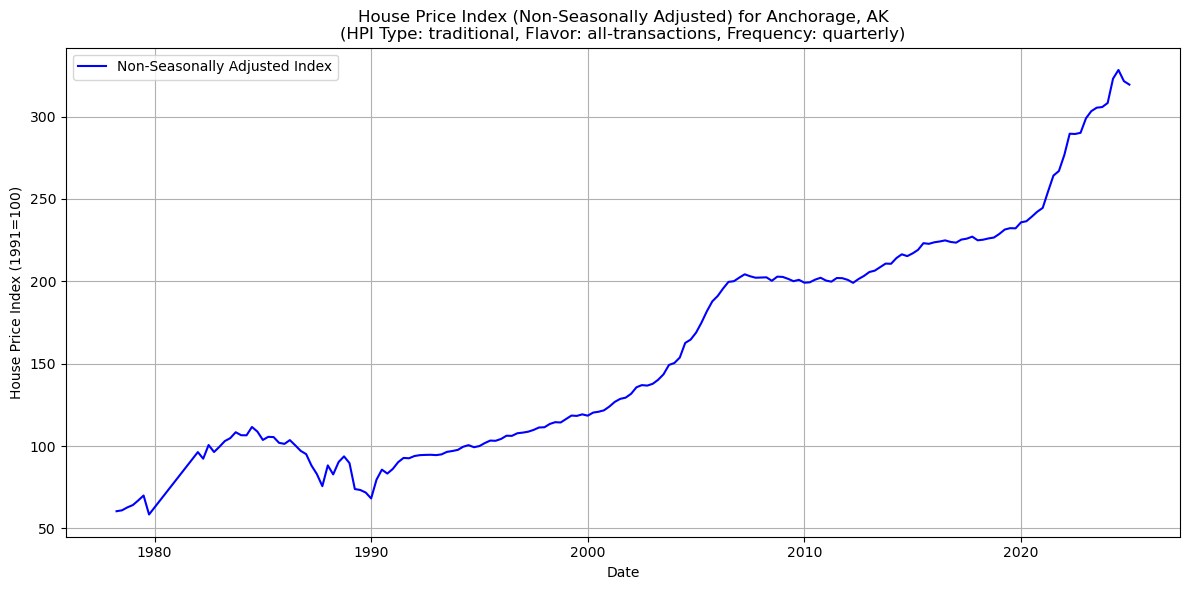


Plot saved as 'anchorage_hpi_nsa.png'
Seasonally Adjusted Index (index_sa) not available or contains all NaN values for the selected filter, so no plot was generated for it.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('hpi_master.csv')

# Define the specific filter for Anchorage, AK, based on data availability
# From our inspection, the available combination is:
# hpi_type='traditional', hpi_flavor='all-transactions', frequency='quarterly'
h_type_filter = 'traditional'
h_flavor_filter = 'all-transactions'
freq_filter = 'quarterly'
place_filter = 'Anchorage, AK'

# Filter the DataFrame based on the identified combination for Anchorage
anchorage_df = df[
    (df['place_name'] == place_filter) &
    (df['hpi_type'] == h_type_filter) &
    (df['hpi_flavor'] == h_flavor_filter) &
    (df['frequency'] == freq_filter)
].copy()

if anchorage_df.empty:
    print(f"Error: No data found for {place_filter} with the specified filters.")
    print(f"Filter used: hpi_type='{h_type_filter}', hpi_flavor='{h_flavor_filter}', frequency='{freq_filter}'")
else:
    print(f"Successfully filtered data for '{place_filter}' using: ('{h_type_filter}', '{h_flavor_filter}', '{freq_filter}')")

    # Combine 'yr' (year) and 'period' (quarter) to create a datetime index
    # 'period' for quarterly data typically represents the quarter (1=Q1, 2=Q2, 3=Q3, 4=Q4).
    # We map these to the first month of each quarter (Jan, Apr, Jul, Oct) for datetime conversion.
    month_map = {1: 1, 2: 4, 3: 7, 4: 10}
    anchorage_df['month'] = anchorage_df['period'].map(month_map)
    anchorage_df['date'] = pd.to_datetime(anchorage_df['yr'].astype(str) + '-' + anchorage_df['month'].astype(str) + '-01')

    # Set the 'date' column as the DataFrame index
    anchorage_df.set_index('date', inplace=True)

    # Sort the DataFrame by date to ensure proper time series plotting
    anchorage_df.sort_index(inplace=True)

    # Display the first few rows of the prepared data
    print("\nPrepared Anchorage HPI data (first 5 rows):")
    print(anchorage_df.head())
    print("\nInformation about prepared data:")
    print(anchorage_df.info())

    # --- Plotting the House Price Index ---

    # Plot the Non-Seasonally Adjusted House Price Index for Anchorage, AK
    plt.figure(figsize=(12, 6))
    plt.plot(anchorage_df.index, anchorage_df['index_nsa'], label='Non-Seasonally Adjusted Index', color='blue')
    plt.title(f'House Price Index (Non-Seasonally Adjusted) for Anchorage, AK\n(HPI Type: {h_type_filter}, Flavor: {h_flavor_filter}, Frequency: {freq_filter})')
    plt.xlabel('Date')
    plt.ylabel('House Price Index (1991=100)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('anchorage_hpi_nsa.png')
    plt.show() # Display the plot in the notebook environment
    print("\nPlot saved as 'anchorage_hpi_nsa.png'")

    # Check and plot the Seasonally Adjusted House Price Index if available
    # The 'index_sa' column contains only NaN values for this specific filtered data,
    # so a plot for it will not be generated.
    if 'index_sa' in anchorage_df.columns and anchorage_df['index_sa'].notna().any():
        plt.figure(figsize=(12, 6))
        plt.plot(anchorage_df.index, anchorage_df['index_sa'], label='Seasonally Adjusted Index', color='orange')
        plt.title(f'House Price Index (Seasonally Adjusted) for Anchorage, AK\n(HPI Type: {h_type_filter}, Flavor: {h_flavor_filter}, Frequency: {freq_filter})')
        plt.xlabel('Date')
        plt.ylabel('House Price Index (1991=100)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.savefig('anchorage_hpi_sa.png')
        plt.show() # Display the plot in the notebook environment
        print("Plot saved as 'anchorage_hpi_sa.png'")
    else:
        print("Seasonally Adjusted Index (index_sa) not available or contains all NaN values for the selected filter, so no plot was generated for it.")